# Investigating Fandango Movie Ratings

Fandango is a digital site selling movie tickets, providing movies' information and ratings.<br>

According to Walt Hickey, the actual rating for movies on Fandango website is almost always rounded up nearest half-star. For instance, 4.1 stars will be rounded to 4.5. This rating system does not truly reflect reviewers' evaluation.<br>

Walt Hickey published an article about his findings in Oct 2015, you can find it [here](https://fivethirtyeight.com/features/fandango-movies-ratings/).

In the response from Fandango's official, the round-up issue happened because of a bug. They promised to fix this issue. <br>

In this project, we will examine the movie rating data after Fandango's response to see if they made changes. For some reason, Fandango has replaced its five-star fan rating by Rotten Tomatoes' audience score in 2019. We will use the dataset with mvies that are released in 2016 and 2017 instead.

One way to see the changes is to compare the ratings data before and after Hickey's analysis:
- [Hickey's dataset in 2015](https://github.com/fivethirtyeight/data/tree/master/fandango)
- [Dataquest's dataset in 2016](https://github.com/mircealex/Movie_ratings_2016_17) 

# Data Cleaning

In [1]:
import pandas as pd
# Read in dataset
before = pd.read_csv('fandango_score_comparison.csv')
before.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [2]:
after = pd.read_csv('movie_ratings_16_17.csv')
after.head()

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0


The dataset includes multiple rating sources, we will isolate the columns that offer information about Fandango's ratings only.

In [3]:
columns_before = ['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue',
           'Fandango_votes', 'Fandango_Difference']
columns_after = ['movie', 'year', 'fandango']
# filter out Fandango's related information
f5 = before[columns_before]
f67 = after[columns_after]

Hickey's dataset includes movies with at least 30 fan reviews on Fandango. It means all movies in 2015 do not have an equal chance of being picked.<br>

Dataquest's dataset includes popular movies released in 2016 and 2017. There is no information on how a movie is considered popular.<br>

The existing conditions for a movie to be selected means that the samples are not randomly picked. The analysis comparing these two data sets that are not good representatives of the population won't reflect the truth.<br>



## Change the Goal of Analysis
We should redefine the goal of this project so that we can utilize the data sets.<br>

&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;**Comparing the ratings for popular movies in 2015 and 2016**<br>

Our populations now become:
- All popular movies in 2015
- All popular movies in 2016

Let's resolve some issues to create reflective samples:
- Movies from 2015 and 2016 only.
- Ensure both data sets includes popular movies.

### Are movies in 2016 dataset popular?
As mentioned, Hickey's dataset defined popular movies have at least 30 fan rating. We don't have this information for the 2016 dataset.<br>

A quick check to ensure for this is to randomly sampling 10 movies from 2016 dataset, then manually check the number of fan ratings for those 10 movies on Fandango website.<br>

In [4]:
# randomly sampling 10 data points
f67.sample(10, random_state = 1)

,movie,year,fandango
108,Mechanic: Resurrection,2016,4.0
206,Warcraft,2016,4.0
106,Max Steel,2016,3.5
107,Me Before You,2016,4.5
51,Fantastic Beasts and Where to Find Them,2016,4.5
33,Cell,2016,3.0
59,Genius,2016,3.5
152,Sully,2016,4.5
4,A Hologram for the King,2016,3.0
31,Captain America: Civil War,2016,4.5


|Movie|Fan ratings|
|-----|-----------|
|Mechanic: Resurrection|2247|
|Warcraft|7271|
|Max Steel|493|
|Me Before You|5263|
|Fantastic Beasts and Where to Find Them|13400|
|Cell|17|
|Genius|127|
|Sully|11877|
|A Hologram for the King|500|
|Captain America: Civil War|35057|

*Data is retrieved as of April 2018*<br>


**Note** *- With Fandango's rating system being replaced, we can't check for live data, we will use data provided by Dataquest for practicing purpose.*<br>

90% of the movies in our sample have more than 30 fan reviews, it is considered popular as in Hickey's dataset. It is not ideal solution but it serves the purpose of this practice.

We also check again Hickey's dataset to make sure all movies have more than 30 fan ratings.

In [5]:
sum(f5['Fandango_votes'] < 30)

0

### Filter out unrelated data points

In [6]:
# Fandango movies in 2015
# ensure releasing year for all movies in 2015
f5['FILM'].str.contains('2015').value_counts()

True     129
False     17
Name: FILM, dtype: int64

In [7]:
# filter out 17 movies in different years
f15 = f5[f5['FILM'].str.contains('2015') == True].copy()

In [8]:
# get movies from 2016 only from 2nd dataset
f16 = f67[f67['year'] == 2016].copy()

### Clean data sets

In [9]:
# first five rows of movies in 2015
f15.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5


In [10]:
# first five rows of movies in 2016
f16.head()

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
4,A Hologram for the King,2016,3.0
5,A Monster Calls,2016,4.0


## Data Analysis
### Distribution of Movie Ratings
Let's take a quick look at the distribution of movie ratings in 2015 and 2016

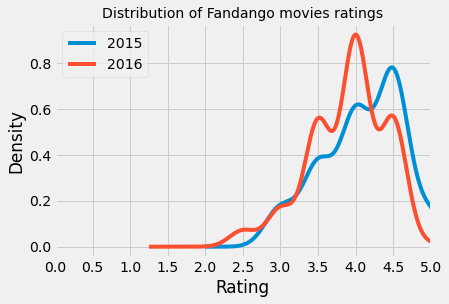

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import style
# using fivethirtyeight for the plot
style.use('fivethirtyeight')

f15['Fandango_Stars'].plot.kde(label = '2015', legend = True)
f16['fandango'].plot.kde(label = '2016', legend = True)
plt.title('Distribution of Fandango movies ratings', fontsize = 14)
plt.xlabel('Rating')
plt.xlim(0,5)
plt.xticks(np.arange(0,5.1,0.5))
plt.show()

Both graphs are highly left skewed. <br>

The graph for 2016 slightly shifted to the left, which shows a change with more lower ratings.<br>

In 2016, some movies are rated at almost 2 while we don't see any movie that are rated less than 2.5 in 2015.<br>

The red graph peaks at 4 showing more movies have ratings of 4 than higher.<br>

We are not sure yet if the difference comes from resolving the bug as we don't have official information. However, it is interesting enough to continue the analysis further as we do see some obvious differences there.<br>

Now, let's take a closer look to more granular information.

### Frequency Distribution Tables

In [12]:
# sample size of 2015 dataset
f15.shape[0]

129

In [13]:
# sample size of 2016 dataset
f16.shape[0]

191

In [14]:
# create a DataFrame to combine the tables
dist = pd.DataFrame(index = np.arange(2.5,5.1,0.5))

As each sample have different sample size, it would be more comparable with normalized distribution.

In [15]:
d15 = round(f15['Fandango_Stars']
      .value_counts(normalize = True)
      .sort_index()*100,2)

In [16]:
d16 = round(f16['fandango']
      .value_counts(normalize = True)
      .sort_index()*100,2)

In [17]:
# combine distribution tables
dist['2015'] = d15
dist['2016'] = d16
dist.fillna(0, inplace = True)
dist['2015 => 2016'] = dist['2016'] - dist['2015']
dist

,2015,2016,2015 => 2016
2.5,0.00,3.14,3.14
3.0,8.53,7.33,-1.20
3.5,17.83,24.08,6.25
4.0,28.68,40.31,11.63
4.5,37.98,24.61,-13.37
5.0,6.98,0.52,-6.46


- 3% of movies have rating of 2.5 while it doesn't have any in 2015.
- From 2015 to 2016, we see an increase of 11% for 4-star movies and a decrease of 13% for 4.5 star movies. 
- Less than 1% movies in 2016 is rated 5 stars.

On overall, the percentage of high rating movies (4.5 - 5) decrease while the percentage of lower rating movies (2.5-4) increase.

### Overall Direction of Change by Summary Statistics Metrics
We will take a look at the mean, median and mode to check the overall direction of change from 2015 to 2016 in Fandango movie ratings.

In [18]:
mean_15 = f15['Fandango_Stars'].mean()
mean_16 = f16['fandango'].mean()

median_15 = f15['Fandango_Stars'].median()
median_16 = f16['fandango'].median()

mode_15 = f15['Fandango_Stars'].mode()[0]
mode_16 = f16['fandango'].mode()[0]

# create DataFrame to combine metrics
summary = pd.DataFrame()
summary['2015'] = [mean_15,median_15,mode_15]
summary['2016'] = [mean_16,median_16,mode_16]
summary.index = ['mean','median','mode']
summary

,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


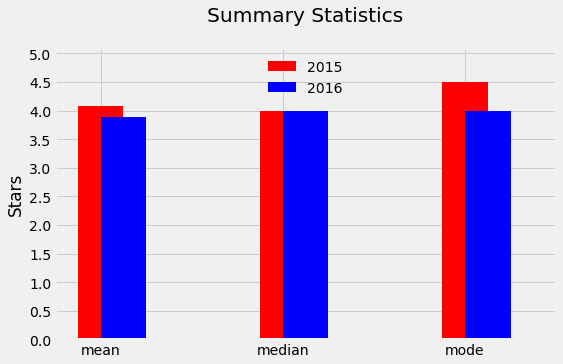

In [19]:
# visualize the metrics
summary['2015'].plot.bar(color = 'red', align = 'center',
                        label = '2015', width = 0.25)
summary['2016'].plot.bar(color = 'blue', align = 'edge',
                        label = '2016', width = 0.25, 
                        rot = 0, figsize = (8,5))
plt.title('Summary Statistics', y = 1.07)
plt.ylabel('Stars')
plt.ylim(0,5.1)
plt.yticks(np.arange(0,5.1,0.5))
plt.legend(loc = 'upper center', framealpha = 0)
plt.show()

In [20]:
round((summary['2015'][0] - summary['2016'][0]) / summary['2015'][0],3)

0.048

The mean rating in 2016 is approximately 0.2 lower, it is almost 5% relative to the mean rating in 2015.<br>
The mode shows the most frequent rating, 4.5 is the most frequent rating score appears in 2015 while 4.0 in 2016.<br>
The median is the same but this metric isn't a meaningful indicator in this case.

## Conclusion
Based on the analysis, we clearly see the difference in the ratings for popular movies released in 2015 and 2016.

*There are more low rating movies and less high rating movies in 2016* <br>

We cannot certainly say the difference derives from the change in rating system or Fandango fixed the bug system as they promised. <br>

However, it is very likely the reason as the difference is observed with the data set collected before and after Hickey's analysis.